<a href="https://colab.research.google.com/github/Phillkao/Project/blob/master/Quality_prediction_data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import os

#### FILE PATH

In [193]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 20160419001_2016419_114348.xls to 20160419001_2016419_114348 (1).xls
Saving 20160419002_2016419_132916.xls to 20160419002_2016419_132916 (1).xls
Saving 20160419004_2016419_153453.xls to 20160419004_2016419_153453 (1).xls
Saving 20160419005_2016419_164411.xls to 20160419005_2016419_164411 (1).xls
Saving 20160421002_2016421_171815.xls to 20160421002_2016421_171815 (1).xls
Saving 20160421003_2016421_182129.xls to 20160421003_2016421_182129 (1).xls
Saving 20160422001_2016422_95822.xls to 20160422001_2016422_95822 (1).xls
Saving 20160422002_2016422_111140.xls to 20160422002_2016422_111140 (1).xls
Saving 20160422003_2016422_161044.xls to 20160422003_2016422_161044 (1).xls
Saving 20160425001_2016425_94440.xls to 20160425001_2016425_94440 (1).xls
Saving 20160425002_2016425_104626.xls to 20160425002_2016425_104626 (1).xls
Saving 20160425003_2016425_11527.xls to 20160425003_2016425_11527 (1).xls
Saving 20160425004_2016425_131231.xls to 20160425004_2016425_131231 (1).xls
Saving 20160425005

In [0]:
pathl = []
df = []
t = []
for fn in uploaded.keys():
    pathl.append(fn)
for i in range(40):
    df.append("df%d" % i)  
    t.append("t%d" % i)

In [0]:
y = []
data1=[]
data2=[]
data3=[]
data4 =[]
X_1 = []
X_2 = []
for i in range(40):
    #read files into list
    df[i] = pd.read_excel(pathl[i])
    
    #dealing with y array
    df_y = df[i].loc[7499]
    y.append(np.float64(df_y.values[0][9:]))
    df[i] = df[i][0:7499]
    
    #cleaning data
    col_1 = pd.DataFrame(df[i].columns.values.reshape(1,4), index=[0], columns = list('ABCD'), dtype= float)
    df[i].columns = list('ABCD')
    df[i] = pd.concat([col_1, df[i]], axis=0)
    df[i].index = range(1,7501)
    
    #dtype of COL_A is 'object', change into float ???????
    df[i].A = pd.to_numeric(df[i].A)
    
    ##data
    data1 = np.append(data1, df[i].A)
    data2 = np.append(data2, df[i].B)
    data3 = np.append(data3, df[i].C)
    data4 = np.append(data4, df[i].D)
    
    ##DATA TESTING
    
    

data1 = np.array(data1)
data2 = np.array(data2)
data3 = np.array(data3)
data4 = np.array(data4)
X_1 = np.append(data1, data2)
X_2 = np.append(data3, data4)
X_1 = np.array(X_1)
X_2 = np.array(X_2)

    #testing
    

#### Get y_array (predicted value array)

In [0]:
Y = np.array(y,dtype=float)

#### Get Cleaned data and X_array (training data) 

In [6]:
df[0].describe()

,A,B,C,D
count,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,2.798203e-06,2.867940e-06,2.724916e-06,1.806650e-06
std,8.643169e-06,6.945007e-06,3.662671e-06,2.355944e-06
min,1.573569e-08,2.150493e-08,2.767096e-08,3.411193e-08
25%,8.920254e-07,9.457329e-07,1.175372e-06,7.952370e-07
50%,1.509237e-06,1.610652e-06,1.868123e-06,1.283463e-06
75%,2.541986e-06,2.722913e-06,2.847342e-06,1.979565e-06
max,3.522643e-04,2.220868e-04,5.263960e-05,3.069520e-05


In [197]:
X = np.zeros((40, 4 ,7500))
for i in range(40):
    X[i] = df[i].T.values
X

array([[[2.29657713e-05, 2.25512117e-05, 1.12122347e-05, ...,
         5.54606497e-06, 1.83502828e-06, 5.03722061e-06],
        [2.12655233e-05, 2.04522481e-05, 1.06301152e-05, ...,
         5.53112018e-06, 2.49113887e-06, 4.11050389e-06],
        [1.98152050e-05, 1.65413600e-05, 9.00513646e-06, ...,
         1.20886168e-06, 1.40519630e-06, 2.75695883e-06],
        [2.05591031e-05, 3.75979720e-06, 8.94675372e-07, ...,
         1.38705042e-06, 1.12200520e-06, 2.46315690e-06]],

       [[1.90828755e-05, 7.82511474e-06, 6.23351384e-06, ...,
         3.80067341e-06, 3.43747548e-06, 3.64677161e-06],
        [1.26615728e-05, 7.99490305e-06, 8.05313479e-06, ...,
         4.04373462e-06, 3.05047083e-06, 4.40090019e-06],
        [5.78274832e-06, 1.29762099e-05, 1.12671924e-05, ...,
         1.54675334e-06, 1.93052147e-06, 1.20959709e-06],
        [6.62764342e-06, 6.29210757e-06, 7.28125021e-06, ...,
         6.17541114e-07, 1.53228872e-06, 1.12510181e-06]],

       [[1.33143539e-05, 1.17612376e

## data analysis

In [269]:
from sklearn.model_selection import train_test_split
x_train0, x_test0 , y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 1)

print(x_train0.shape,x_test0.shape,
      y_train.shape,y_test.shape)


x_train = (x_train0 - x_train0.min()) / (x_train0.max() - x_train0.min())
x_test = (x_test0 - x_test0.min()) / (x_test0.max() - x_test0.min())
x_test.max(),x_train.min()

X_1 = (X - X.min()) / (X.max() - X.min())

(32, 4, 7500) (8, 4, 7500) (32,) (8,)


(0, 10)

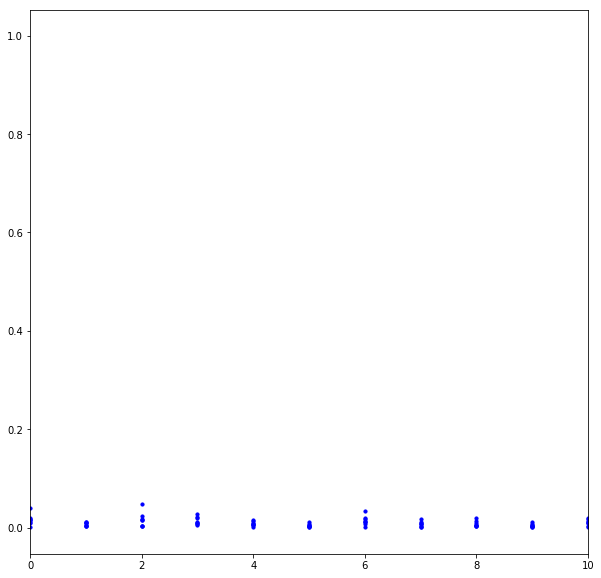

In [9]:
plt.figure(1, figsize=(10,10))
for i in range(8):
    plt.scatter(np.arange(30000), x_test[i] , c = 'blue',s = 10)
plt.xlim(0,10)

### By using ARtime series testing

In [0]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset

In [11]:
# fit model
for data in [data1,data2,data3,data4]:
    data.reshape(300000,)
    model = AR(data)
    model_fit = model.fit()
# make prediction
    print('Lag: %s' % model_fit.k_ar)
    print('Coefficients: %s' % model_fit.params)

Lag: 89
Coefficients: [ 9.86580549e-07  4.80630865e-01  3.86899141e-02  3.59014063e-02
  1.03144644e-02  1.28539895e-02  7.03713887e-03  5.35838922e-03
  5.03589272e-03  2.22439060e-03  1.81348200e-03  3.32520271e-03
  3.53444297e-03  2.07479044e-03  6.14155070e-03  6.25915641e-04
  2.84612189e-04  9.99755064e-04 -1.18755771e-03  4.47837563e-04
 -1.52385541e-03  2.28603062e-03  2.22078770e-03  3.51661453e-03
  7.72603356e-04  4.04173062e-03  2.47572057e-03  3.97750200e-04
  4.05041607e-03 -2.22426676e-03  4.34406282e-03  6.04758473e-03
 -5.31365771e-03  3.53751613e-03  3.00220700e-02 -9.49960279e-03
  3.60185222e-03 -4.36936715e-03 -5.48627350e-03  4.12480053e-03
  1.03166545e-02 -2.00144708e-03 -4.89121416e-03 -3.20982289e-03
 -3.44306032e-03  5.39185783e-03 -2.61921422e-04 -4.52625900e-04
  3.18845443e-03 -4.35652680e-03 -1.31869098e-03 -2.66371501e-03
 -3.20852206e-04  7.43551406e-03 -5.15688683e-03 -1.22659280e-03
 -1.71333224e-03 -2.12152338e-04  2.67398476e-03 -4.03690282e-05
 -4

### correlation analysis

In [12]:
for i in range(40):
    print(df[i].corr())

          A         B         C         D
A  1.000000  0.810577  0.424371  0.552636
B  0.810577  1.000000  0.435864  0.565078
C  0.424371  0.435864  1.000000  0.800555
D  0.552636  0.565078  0.800555  1.000000
          A         B         C         D
A  1.000000  0.760600  0.507784  0.576173
B  0.760600  1.000000  0.418676  0.478727
C  0.507784  0.418676  1.000000  0.806351
D  0.576173  0.478727  0.806351  1.000000
          A         B         C         D
A  1.000000  0.795195  0.514413  0.585885
B  0.795195  1.000000  0.409598  0.479964
C  0.514413  0.409598  1.000000  0.790886
D  0.585885  0.479964  0.790886  1.000000
          A         B         C         D
A  1.000000  0.834213  0.496393  0.575106
B  0.834213  1.000000  0.401142  0.494696
C  0.496393  0.401142  1.000000  0.774638
D  0.575106  0.494696  0.774638  1.000000
          A         B         C         D
A  1.000000  0.739037  0.553212  0.573156
B  0.739037  1.000000  0.418777  0.468469
C  0.553212  0.418777  1.000000  0

In [13]:
data1 = (data1 - data1.min()) / (data1.max() - data1.min())
data2 = (data2 - data2.min()) / (data2.max() - data2.min())
data3 = (data3 - data3.min()) / (data3.max() - data3.min())
data4 = (data4 - data4.min()) / (data4.max() - data4.min())
data1.max() , data1.min()

(1.0, 0.0)

(0, 1)

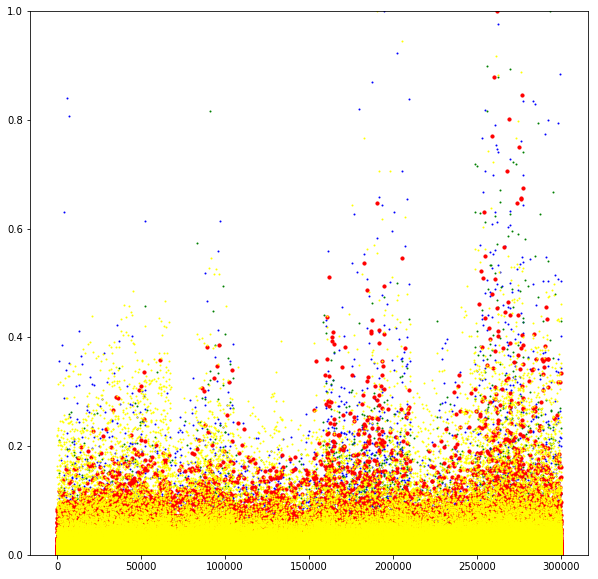

In [14]:
 
    
plt.figure(1, figsize=(10,10))
plt.scatter(np.arange(300000), data1 , c = 'blue',s = 1)
plt.scatter(np.arange(300000), data2 , c = 'green',s = 1)
plt.scatter(np.arange(300000), data3 , c = 'red',s = 10)
plt.scatter(np.arange(300000), data4 , c = 'yellow',s = 1)

plt.ylim(0, 1)


In [15]:
len(data1)

300000

### construct nn

In [0]:
for i in range(40):
    T = pd.concat([df[i].A,df[i].B])
    S = pd.concat([df[i].C,df[i].D])
    dic1 = {'A':T , 'B': S}
    t[i] = pd.DataFrame(dic1)
    t[i].index = range(1,15001)

In [17]:
T = np.zeros((40, 15000, 2))
for i in range(40):
    T[i] = t[i].values
T

array([[[2.29657713e-05, 1.98152050e-05],
        [2.25512117e-05, 1.65413600e-05],
        [1.12122347e-05, 9.00513646e-06],
        ...,
        [5.53112018e-06, 1.38705042e-06],
        [2.49113887e-06, 1.12200520e-06],
        [4.11050389e-06, 2.46315690e-06]],

       [[1.90828755e-05, 5.78274832e-06],
        [7.82511474e-06, 1.29762099e-05],
        [6.23351384e-06, 1.12671924e-05],
        ...,
        [4.04373462e-06, 6.17541114e-07],
        [3.05047083e-06, 1.53228872e-06],
        [4.40090019e-06, 1.12510181e-06]],

       [[1.33143539e-05, 2.90081151e-06],
        [1.17612376e-05, 2.85707201e-05],
        [1.11893617e-05, 1.56680878e-05],
        ...,
        [6.82580713e-07, 2.18332221e-06],
        [2.07701239e-06, 1.16757922e-06],
        [1.43784577e-06, 5.07022683e-07]],

       ...,

       [[8.14204897e-06, 8.41420292e-06],
        [2.71323674e-06, 2.85430684e-05],
        [5.15385116e-06, 5.94335525e-06],
        ...,
        [3.18866548e-06, 2.38071965e-06],
     

In [18]:
x_tr, x_te , y_train, y_test = train_test_split(T, Y, test_size = 0.2, random_state= 1)

print(x_tr.shape,x_te.shape)

(32, 15000, 2) (8, 15000, 2)


In [0]:
xtr = x_tr.reshape(len(x_tr), 2*15000 ,1)
xte = x_te.reshape(len(x_te), 2*15000, 1)

In [28]:
xtr.shape

(32, 30000, 1)

In [0]:
import keras

In [0]:
from keras.models import Input, Model, Sequential
from keras.activations import selu,sigmoid, K
from keras.layers import Dense, LSTM, RNN,Embedding,BatchNormalization, Dropout
from keras.losses import MSE, categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing import sequence

In [0]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [0]:
model = Sequential()
model.add(LSTM(100, input_shape = (4,7500),dropout=0.5, recurrent_dropout=0.5))

model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(Dense(1, activation='selu'))

In [0]:
model = Sequential()

model.add(LSTM(100, input_shape = (4,7500)))

model.add(Dense(1, activation='selu'))

In [261]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 100)               3040400   
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 100)               400       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 101       
Total params: 3,040,901
Trainable params: 3,040,701
Non-trainable params: 200
_________________________________________________________________


In [0]:
model.compile(loss = root_mean_squared_error,
             optimizer = Adam(lr = 0.001),
            )

In [263]:
model.fit(x_train ,y_train, batch_size = 100, epochs = 300,
         verbose = 1,
         validation_data = (x_test, y_test))

Train on 32 samples, validate on 8 samples
Epoch 1/300
32/32 [==============================] - 9s 279ms/step - loss: 1.0534 - val_loss: 0.9601
Epoch 2/300
32/32 [==============================] - 0s 6ms/step - loss: 0.8450 - val_loss: 1.0220
Epoch 3/300
32/32 [==============================] - 0s 6ms/step - loss: 0.9180 - val_loss: 0.8604
Epoch 4/300
32/32 [==============================] - 0s 6ms/step - loss: 0.9828 - val_loss: 0.5816
Epoch 5/300
32/32 [==============================] - 0s 6ms/step - loss: 0.9779 - val_loss: 0.2933
Epoch 6/300
32/32 [==============================] - 0s 6ms/step - loss: 1.0467 - val_loss: 0.2651
Epoch 7/300
32/32 [==============================] - 0s 6ms/step - loss: 1.0947 - val_loss: 0.3118
Epoch 8/300
32/32 [==============================] - 0s 6ms/step - loss: 1.2136 - val_loss: 0.4977
Epoch 9/300
32/32 [==============================] - 0s 6ms/step - loss: 1.2356 - val_loss: 0.7456
Epoch 10/300
32/32 [==============================] - 0s 6ms/ste

In [176]:
y_test

array([0.5047, 0.5747, 0.4993, 0.7149, 0.6848, 0.6367, 0.6478, 0.4901])

In [270]:
model.predict(X_1)

array([[0.2880967 ],
       [0.41281396],
       [0.43681517],
       [0.43240187],
       [0.77050173],
       [0.5918872 ],
       [0.45932207],
       [0.43224853],
       [0.38529983],
       [0.5271696 ],
       [0.41128528],
       [0.54900587],
       [0.69222766],
       [0.42199433],
       [0.32088408],
       [0.5286932 ],
       [0.60396737],
       [0.5048961 ],
       [0.655513  ],
       [0.81840855],
       [0.49002036],
       [0.667513  ],
       [0.6388856 ],
       [0.59454703],
       [0.7145829 ],
       [1.0152168 ],
       [0.94427717],
       [0.81832707],
       [0.33630764],
       [0.5083586 ],
       [0.32537094],
       [0.52669114],
       [0.45116425],
       [0.38697127],
       [0.5415441 ],
       [0.77172065],
       [0.8619351 ],
       [0.41667986],
       [0.41391388],
       [0.52204984]], dtype=float32)

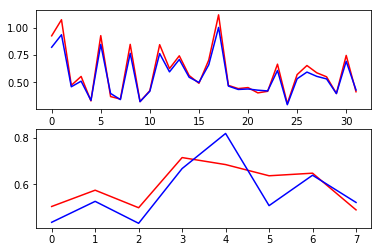

In [266]:
plt.subplot(211)
plt.plot(np.arange(32), y_train, c='r')
plt.plot(np.arange(32), model.predict(x_train) , c = 'blue')

plt.subplot(212)
plt.plot(np.arange(8), y_test, c='r')
plt.plot(np.arange(8), model.predict(x_test) , c = 'blue')

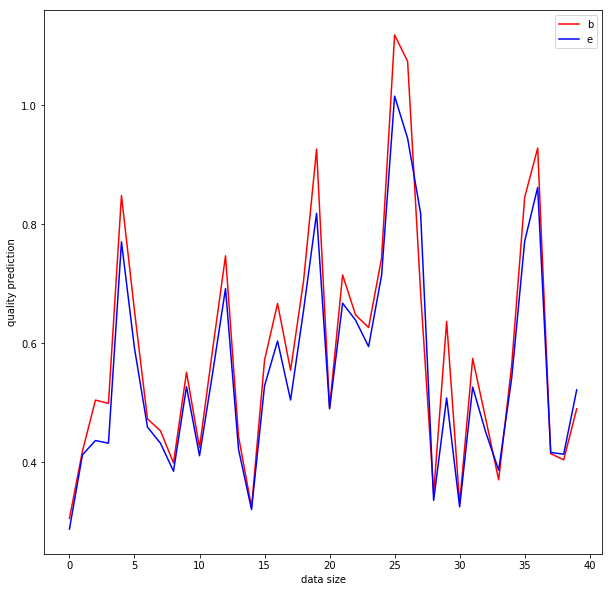

In [274]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(40), Y, c='r', label = 'REAL')
plt.plot(np.arange(40), model.predict(X_1) , c = 'blue', label = 'Predicted')

plt.xlabel('data size')
plt.ylabel('quality prediction')

plt.legend('best')

In [0]:
def rmse(x, y):
   return np.sqrt(((y - x) ** 2).mean())

In [272]:
rmse(model.predict(X_1), Y)

0.26632238617044435

In [0]:
model_json = model.to_json()
open('quality_prediction_1', 'w').write(model_json)
model.save_weights('quality_prediction_1.h')

In [277]:
from keras.models import model_from_json
model_json = model.to_json()
with open('quality_prediction_1.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("quality_prediction_1.h5")
print("Saved model to disk")

Saved model to disk


In [278]:
from google.colab import files
uploaded = files.upload()

for real in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=real, length=len(uploaded[real])))

Saving 1_10450.xls to 1_10450.xls
Saving 2_143535.xls to 2_143535.xls
Saving 3_17837.xls to 3_17837.xls
Saving 4_175644.xls to 4_175644.xls
Saving 5_17747.xls to 5_17747.xls
Saving 6_8419.xls to 6_8419.xls
Saving 7_161338.xls to 7_161338.xls
Saving 8_181928.xls to 8_181928.xls
Saving 9_84549.xls to 9_84549.xls
Saving 10_155127.xls to 10_155127.xls
User uploaded file "1_10450.xls" with length 730624 bytes
User uploaded file "2_143535.xls" with length 730624 bytes
User uploaded file "3_17837.xls" with length 730624 bytes
User uploaded file "4_175644.xls" with length 730624 bytes
User uploaded file "5_17747.xls" with length 730624 bytes
User uploaded file "6_8419.xls" with length 730624 bytes
User uploaded file "7_161338.xls" with length 730624 bytes
User uploaded file "8_181928.xls" with length 730624 bytes
User uploaded file "9_84549.xls" with length 730624 bytes
User uploaded file "10_155127.xls" with length 730624 bytes


In [0]:
path2 = []
df2 = []
t2 = []
for real in uploaded.keys():
    path2.append(real)
for i in range(10):
    df2.append("df%d" % i)  
    t2.append("t%d" % i)

In [0]:
for i in range(10):
    #read files into list
    df2[i] = pd.read_excel(path2[i])
    

    #cleaning data
    col_1 = pd.DataFrame(df2[i].columns.values.reshape(1,4), index=[0], columns = list('ABCD'), dtype= float)
    df2[i].columns = list('ABCD')
    df2[i] = pd.concat([col_1, df2[i]], axis=0)
    df2[i].index = range(1,7501)
    
    #dtype of COL_A is 'object', change into float ???????
    df2[i].A = pd.to_numeric(df2[i].A)
    

In [287]:
XX = np.zeros((10, 4 ,7500))
for i in range(10):
    XX[i] = df2[i].T.values
XX

array([[[1.90016922e-05, 1.83946173e-05, 1.63527120e-05, ...,
         5.70849121e-07, 7.22206854e-07, 2.09590435e-06],
        [1.48468933e-05, 1.63873177e-05, 1.67252819e-05, ...,
         2.20205789e-06, 2.40005443e-06, 1.62559435e-06],
        [2.02268313e-05, 2.67338404e-05, 1.13532132e-05, ...,
         8.59131178e-07, 5.25593255e-07, 4.34669004e-06],
        [1.93413697e-05, 1.90832277e-05, 9.92758456e-06, ...,
         4.31837423e-07, 1.00446250e-06, 2.30678102e-06]],

       [[1.26515192e-05, 6.06982430e-06, 1.98018709e-06, ...,
         4.59949553e-06, 5.12132714e-06, 3.10574628e-06],
        [1.07380450e-05, 4.70688128e-06, 1.77143956e-06, ...,
         6.73080009e-06, 4.49058318e-06, 3.19109497e-06],
        [1.39013804e-05, 1.20116859e-05, 1.44996068e-05, ...,
         2.28607048e-06, 1.29811650e-06, 1.08281733e-06],
        [4.41363440e-06, 4.94745258e-06, 7.87304324e-06, ...,
         2.52749411e-06, 2.76560482e-06, 1.34824145e-06]],

       [[4.61587533e-06, 1.93649340e

In [0]:
XX_1 = (XX - XX.min()) / (XX.max() - XX.min())

In [290]:
model.predict(XX_1)

array([[0.5048183 ],
       [0.47033897],
       [0.5035056 ],
       [0.54047376],
       [0.5944152 ],
       [0.676899  ],
       [0.495694  ],
       [0.46301422],
       [0.5006594 ],
       [0.54138935]], dtype=float32)

In [300]:
for i in range(10):
  print('The quality prediction of NUM (%d) data is = (%f)' %(i, model.predict(XX_1)[i]))

The quality prediction of NUM (0) data is = (0.504818)
The quality prediction of NUM (1) data is = (0.470339)
The quality prediction of NUM (2) data is = (0.503506)
The quality prediction of NUM (3) data is = (0.540474)
The quality prediction of NUM (4) data is = (0.594415)
The quality prediction of NUM (5) data is = (0.676899)
The quality prediction of NUM (6) data is = (0.495694)
The quality prediction of NUM (7) data is = (0.463014)
The quality prediction of NUM (8) data is = (0.500659)
The quality prediction of NUM (9) data is = (0.541389)
